In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import os
from scipy.optimize import linear_sum_assignment  # Added for cluster-label mapping

In [4]:
# Load the dataset
train_df = pd.read_csv('C:\\Users\\fabrizio natali\\Desktop\\dissertation\\train_data.csv')

In [5]:
df = pd.read_csv('C:\\Users\\fabrizio natali\\Desktop\\dissertation\\train_data.csv')
display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Get the columns with more than 20% missing data
columns_to_drop = missing_percentage[missing_percentage > 20].index

# Drop the columns from the DataFrame
df_cleaned = df.drop(columns=columns_to_drop)
display(df_cleaned.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.impute import SimpleImputer

# Impute missing values then scale (K-means cannot handle NaNs)
# Use df_cleaned and separate features from target
X_temp = df_cleaned.drop('TARGET', axis=1) if 'TARGET' in df_cleaned.columns else df_cleaned

# Apply one-hot encoding to non-numeric columns first
non_numeric_cols_temp = X_temp.select_dtypes(exclude=np.number).columns
if len(non_numeric_cols_temp) > 0:
    X_temp = pd.get_dummies(X_temp, columns=non_numeric_cols_temp)

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_temp)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Verify no NaNs remain
if np.isnan(X_scaled).any():
    print("Warning: NaNs remain after imputation!")
else:
    print("Imputation successful: no NaNs remain.")

Imputation successful: no NaNs remain.


In [9]:
def read_data(file_name):
  df = pd.read_csv(file_name)  # Use the file_name parameter
  print(file_name, 'has', len(df), 'data points')
  return df

In [10]:
# If you want to see the number of data points, call the function like this:
train_df_read = read_data('C:\\Users\\fabrizio natali\\Desktop\\dissertation\\train_data.csv')

C:\Users\fabrizio natali\Desktop\dissertation\train_data.csv has 307511 data points


In [11]:
# Identify non-numeric columns
non_numeric_cols = df_cleaned.select_dtypes(exclude=np.number).columns
print("Non-numeric columns found:", non_numeric_cols)

Non-numeric columns found: Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')


In [12]:
# Apply one-hot encoding to convert non-numeric columns to numeric
df_encoded = pd.get_dummies(df_cleaned, columns=non_numeric_cols)
display(df_encoded.head())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,False,False,False,False,False,False,False,False,False,False
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Verify that all columns are now numeric (except potentially the target variable if it was non-numeric initially)
print("Data types after encoding:")
display(df_encoded.dtypes)

Data types after encoding:


SK_ID_CURR                               int64
TARGET                                   int64
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
                                        ...   
ORGANIZATION_TYPE_Transport: type 2       bool
ORGANIZATION_TYPE_Transport: type 3       bool
ORGANIZATION_TYPE_Transport: type 4       bool
ORGANIZATION_TYPE_University              bool
ORGANIZATION_TYPE_XNA                     bool
Length: 167, dtype: object

In [14]:
# Use the real data instead of generating sample data
# Separate features (X) and target (y) from the real dataset
X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

print(f"Real dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Target distribution:")
print(y.value_counts())

Real dataset shape: (307511, 166)
Number of features: 166
Number of samples: 307511
Target distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64


In [15]:
# Scale the features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")


Training set size: 246008 samples
Testing set size: 61503 samples
Number of features: 166
Number of classes: 2


In [17]:
# Train K-means classifier
n_clusters = len(np.unique(y))
print(f"Training K-means with {n_clusters} clusters...")

Training K-means with 2 clusters...


In [18]:
# Re-impute and scale features to remove NaNs before K-means
# (Some columns retained NaNs after earlier preprocessing)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Recreate train/test split using cleaned data
X_train, X_test, y_train, y_test = train_test_split(
	X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Sanity check
if np.isnan(X_train).any() or np.isnan(X_test).any():
	raise ValueError("NaNs remain after imputation. Aborting K-means training.")
else:
	print("Imputation & scaling successful: no NaNs in train/test sets.")

# Initialize and train K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X_train)

# Provide a universal alias expected by downstream cells (even though KMeans has no predict_proba)
model = kmeans

print("K-means training completed!")
print(f"Inertia: {kmeans.inertia_:.2f}")
print(f"Number of iterations: {kmeans.n_iter_}")

Imputation & scaling successful: no NaNs in train/test sets.
K-means training completed!
Inertia: 39062014.00
Number of iterations: 14


In [19]:
# Map cluster labels to true labels
# K-means gives arbitrary cluster labels, we need to map them to true labels

from scipy.optimize import linear_sum_assignment  # <-- Added import

def map_clusters_to_labels(y_true, y_pred):
    """
    Map cluster labels to true labels using Hungarian algorithm
    """
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Use Hungarian algorithm to find optimal mapping
    row_ind, col_ind = linear_sum_assignment(-cm)
    
    # Create mapping dictionary
    mapping = dict(zip(col_ind, row_ind))
    
    # Apply mapping to predictions
    y_pred_mapped = np.array([mapping[label] for label in y_pred])
    
    return y_pred_mapped, mapping

In [20]:
# Make predictions
y_train_pred = kmeans.predict(X_train)
y_test_pred = kmeans.predict(X_test)

print("Predictions completed!")
print(f"\nCluster distribution in training set:")
unique, counts = np.unique(y_train_pred, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} samples ({count/len(y_train_pred)*100:.1f}%)")

print(f"\nCluster distribution in test set:")
unique, counts = np.unique(y_test_pred, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} samples ({count/len(y_test_pred)*100:.1f}%)")

Predictions completed!

Cluster distribution in training set:
Cluster 0: 201856 samples (82.1%)
Cluster 1: 44152 samples (17.9%)

Cluster distribution in test set:
Cluster 0: 50273 samples (81.7%)
Cluster 1: 11230 samples (18.3%)


In [21]:
# Map cluster labels for both train and test sets
y_train_mapped, train_mapping = map_clusters_to_labels(y_train, y_train_pred)
y_test_mapped = np.array([train_mapping.get(label, label) for label in y_test_pred])

print("Cluster to label mapping:")
for cluster, label in train_mapping.items():
    print(f"Cluster {cluster} -> Label {label}")

print(f"\nMapped predictions distribution in training set:")
unique, counts = np.unique(y_train_mapped, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Label {label}: {count} samples ({count/len(y_train_mapped)*100:.1f}%)")

Cluster to label mapping:
Cluster 0 -> Label 0
Cluster 1 -> Label 1

Mapped predictions distribution in training set:
Label 0: 201856 samples (82.1%)
Label 1: 44152 samples (17.9%)


In [22]:
# Evaluate the model using clustering metrics
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Clustering evaluation metrics
train_silhouette = silhouette_score(X_train, y_train_pred)
test_silhouette = silhouette_score(X_test, y_test_pred)
train_ari = adjusted_rand_score(y_train, y_train_pred)
test_ari = adjusted_rand_score(y_test, y_test_pred)

print("=== CLUSTERING EVALUATION METRICS ===")
print(f"Training Silhouette Score: {train_silhouette:.4f}")
print(f"Test Silhouette Score: {test_silhouette:.4f}")
print(f"Training Adjusted Rand Index: {train_ari:.4f}")
print(f"Test Adjusted Rand Index: {test_ari:.4f}")
print(f"Inertia (Lower is better): {kmeans.inertia_:.2f}")

=== CLUSTERING EVALUATION METRICS ===
Training Silhouette Score: -0.0098
Test Silhouette Score: -0.0105
Training Adjusted Rand Index: -0.0288
Test Adjusted Rand Index: -0.0272
Inertia (Lower is better): 39062014.00


In [23]:
# Show cluster centers
print(f"\nCluster Centers:")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}: {center}")

print(f"\nModel successfully trained and evaluated!")


Cluster Centers:
Cluster 0: [ 5.96463371e-04  1.11382573e-01  2.99708610e-02  3.06519810e-02
  4.74793141e-02  2.96087959e-02  1.09533042e-03  2.91067908e-01
 -4.68587069e-01  9.85986454e-02  1.27828485e-01 -9.43884316e-04
  4.68555052e-01  1.10088617e-01 -6.45201496e-03 -7.62558991e-03
  2.95079152e-02  1.08476495e-01 -1.56105389e-02 -1.62264699e-02
  4.17815571e-02  1.57414774e-02  5.27162314e-02  4.82061250e-02
  4.18800241e-02  1.21409557e-01  1.04882574e-01  8.75279561e-03
 -4.82352322e-02 -2.65957299e-03 -7.76594841e-03 -2.74421015e-03
 -7.68885009e-03 -9.92330703e-03  1.87939077e-03  1.17318897e-01
  8.73383694e-04  9.25618100e-03 -2.80458373e-01  9.70375639e-05
  5.71260927e-02  1.03073573e-02 -1.65610032e-03  1.28031629e-02
 -6.07706680e-04  9.06438746e-03  1.12845383e-02  6.10165531e-03
  2.11841010e-02  1.87319192e-03  1.93615540e-02  5.45942221e-03
  4.53185171e-03  3.08335273e-03  5.15557623e-04 -1.11794859e-03
 -1.41996030e-03  1.48839772e-02 -8.26510341e-03 -2.22415693e

In [24]:
# Evaluate the (unsupervised) K-means results after label mapping
# y_test_mapped already created in Cell 17 (mapped cluster labels -> true label space)
# Use it as y_pred for classification-style metrics

from sklearn.metrics import roc_auc_score, average_precision_score  # Needed (not imported earlier)

y_pred = y_test_mapped

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# ROC AUC & Average Precision with hard labels:
# Guard against single-class edge cases to avoid ValueError.
if len(np.unique(y_test)) == 2 and len(np.unique(y_pred)) > 1:
	roc_auc = roc_auc_score(y_test, y_pred)
	try:
		average_precision = average_precision_score(y_test, y_pred)
	except ValueError:
		average_precision = float('nan')
else:
	roc_auc = float('nan')
	average_precision = float('nan')

confusion = confusion_matrix(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score (labels used as scores):", roc_auc)
print("Average Precision Score (labels used as scores):", average_precision)
print("Confusion Matrix:")
print(confusion)

Test Set Accuracy: 0.7568411297009902
Precision: 0.05520926090828139
Recall: 0.12487411883182276
F1 Score: 0.07656684161778327
ROC AUC Score (labels used as scores): 0.46860636147824114
Average Precision Score (labels used as scores): 0.07754116811815699
Confusion Matrix:
[[45928 10610]
 [ 4345   620]]


In [37]:
# For KMeans, we can approximate feature importance using cluster center magnitudes
# Calculate the mean absolute value of each feature across all cluster centers
column_names = X.columns.tolist()
feature_importances_kmeans = np.abs(kmeans.cluster_centers_).mean(axis=0)
feature_importances = pd.Series(feature_importances_kmeans, index=column_names)

# Sort the importances in descending order and display the top 10
top_features = feature_importances.sort_values(ascending=False).head(10)
print("Top 10 most important features (based on cluster center magnitudes):")
print(top_features)

Top 10 most important features (based on cluster center magnitudes):
ORGANIZATION_TYPE_XNA                    1.300981
DAYS_EMPLOYED                            1.300835
FLAG_EMP_PHONE                           1.300800
NAME_INCOME_TYPE_Pensioner               1.300574
DAYS_BIRTH                               0.806118
FLAG_DOCUMENT_6                          0.778005
NAME_INCOME_TYPE_Working                 0.629572
DAYS_ID_PUBLISH                          0.356024
NAME_INCOME_TYPE_Commercial associate    0.335639
REG_CITY_NOT_WORK_CITY                   0.334323
dtype: float64


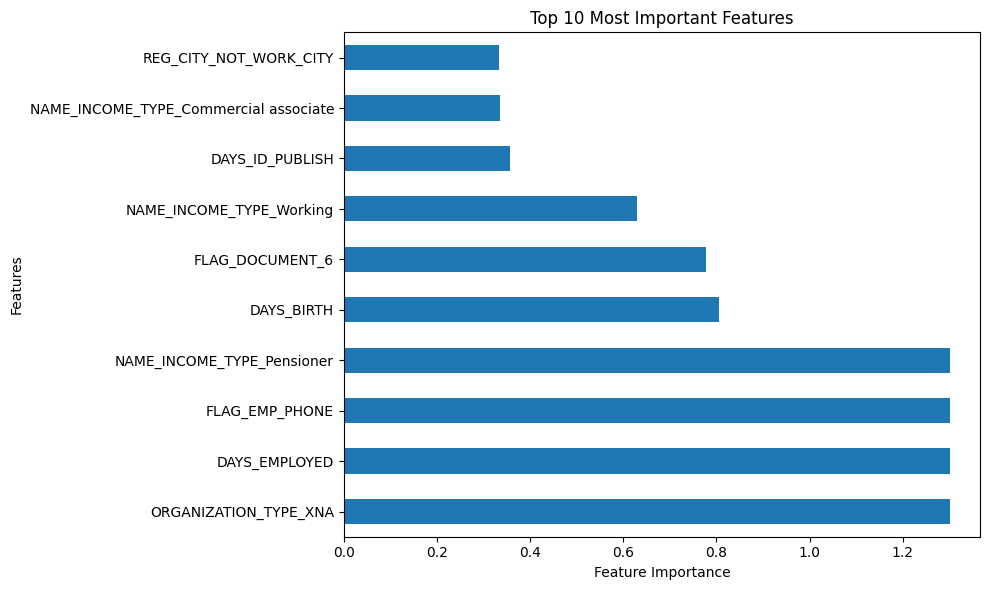

In [39]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

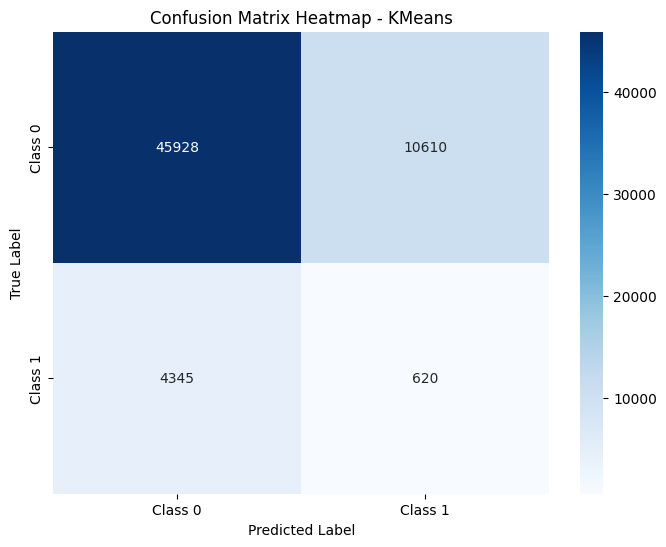

Confusion Matrix:
[[45928 10610]
 [ 4345   620]]


In [40]:
# Use previously computed mapped cluster predictions (from Cell 17) for visualization
# This avoids NameError since 'model' is not defined in the notebook.
y_pred_viz = y_test_mapped  # Already aligned to true label space

# Create confusion matrix
confusion_viz = confusion_matrix(y_test, y_pred_viz)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_viz, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix Heatmap - KMeans')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Confusion Matrix:")
print(confusion_viz)

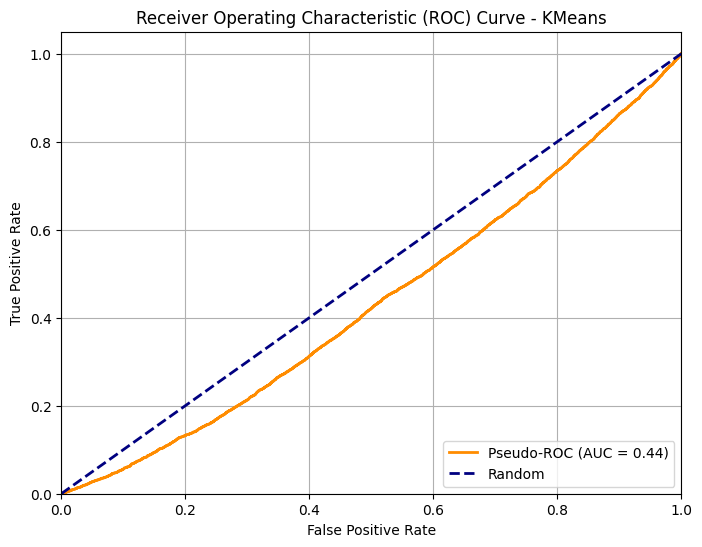

In [41]:
# ROC Curve visualization for KMeans (using pseudo-probabilities)
# KMeans is unsupervised and has no native predict_proba. We approximate class 1 probability
# by mapping cluster distances to soft assignments, then aggregating clusters mapped to label 1.

import numpy as np
from sklearn.metrics import roc_curve, auc

# 1. Ensure required objects exist
try:
    kmeans  # trained KMeans
    y_test
    X_test
    y_test_mapped
except NameError as e:
    raise RuntimeError(f"Missing object for ROC computation: {e}")

# 2. Build / reuse cluster->label mapping (train_mapping expected from earlier mapping cell)
try:
    train_mapping
except NameError:
    raise RuntimeError("train_mapping not found. Run the cluster mapping cell first.")

# Invert mapping: label -> list of clusters
label_to_clusters = {}
for cluster, label in train_mapping.items():
    label_to_clusters.setdefault(label, []).append(cluster)

if 1 not in label_to_clusters or 0 not in label_to_clusters:
    # Fallback: cannot build binary ROC if a label missing
    raise RuntimeError("Cannot compute ROC: one of the classes (0 or 1) not present in mapping.")

# 3. Compute distances and derive soft cluster responsibilities
# Distances shape: (n_samples, n_clusters)
distances = kmeans.transform(X_test)
# Avoid division by zero; add tiny epsilon
inv_dist = 1.0 / (distances + 1e-12)
soft_assign = inv_dist / inv_dist.sum(axis=1, keepdims=True)  # row-normalized

# 4. Aggregate to pseudo probability for label=1
clusters_label1 = label_to_clusters[1]
proba_label1 = soft_assign[:, clusters_label1].sum(axis=1)

# Sanity clamp (numerical drift)
proba_label1 = np.clip(proba_label1, 0.0, 1.0)

# 5. Compute ROC curve
if len(np.unique(y_test)) == 2:
    fpr, tpr, thresholds = roc_curve(y_test, proba_label1)
    roc_auc_viz = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Pseudo-ROC (AUC = {roc_auc_viz:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - KMeans')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
else:
    print("Cannot compute ROC curve: y_test is not binary.")

# Store for reuse in PR curve
kmeans_pseudo_proba = proba_label1

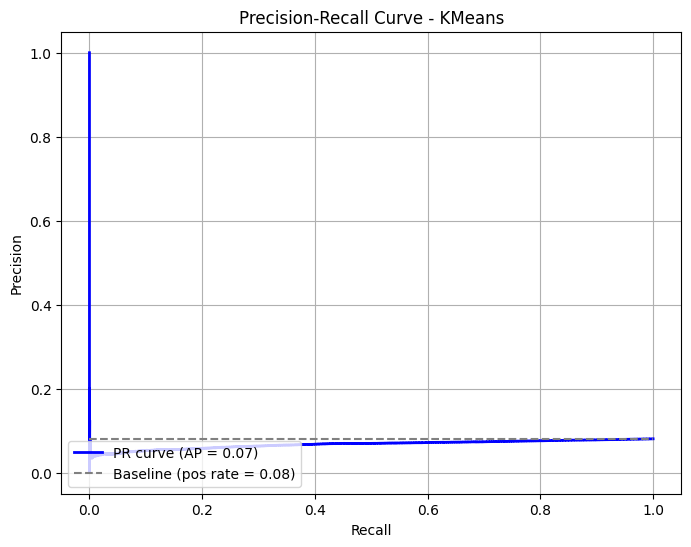

In [42]:
# Precision-Recall Curve for KMeans (using pseudo-probabilities from previous cell)
from sklearn.metrics import precision_recall_curve, average_precision_score

# Reuse pseudo probabilities
try:
    kmeans_pseudo_proba
except NameError:
    raise RuntimeError("kmeans_pseudo_proba not found. Run the ROC pseudo-probability cell first.")

if len(np.unique(y_test)) == 2:
    precision_viz, recall_viz, _ = precision_recall_curve(y_test, kmeans_pseudo_proba)
    avg_precision_viz = average_precision_score(y_test, kmeans_pseudo_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(recall_viz, precision_viz, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_viz:.2f})')
    baseline = (y_test == 1).mean()
    plt.hlines(baseline, 0, 1, colors='gray', linestyles='--', label=f'Baseline (pos rate = {baseline:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - KMeans')
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()
else:
    print("Cannot compute PR curve: y_test is not binary.")

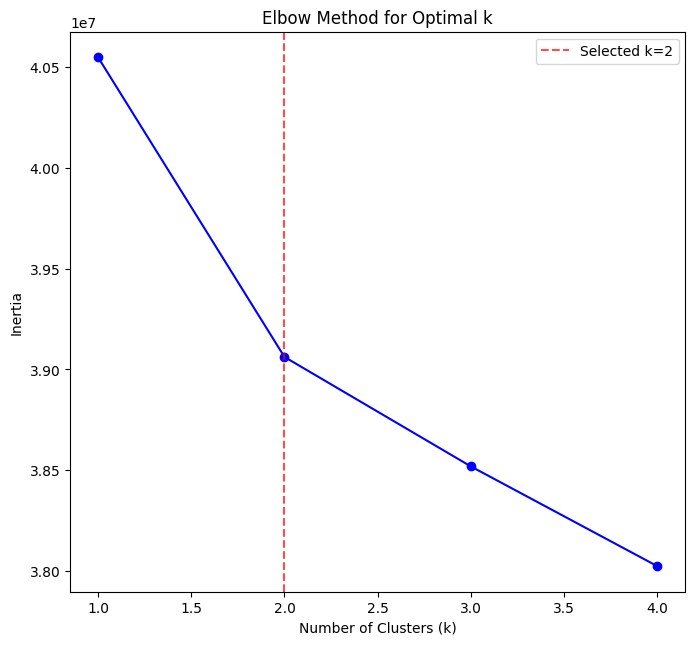

In [43]:
# 3. Inertia vs Number of Clusters (Elbow Method)
plt.figure(figsize=(27, 16))
plt.subplot(2, 3, 3)
k_range = range(1, min(11, len(np.unique(y)) + 3))
inertias = []
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_train)
    inertias.append(kmeans_temp.inertia_)

plt.plot(k_range, inertias, 'bo-')
plt.axvline(x=n_clusters, color='red', linestyle='--', alpha=0.7, label=f'Selected k={n_clusters}')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()

=== KMEANS (UNSUPERVISED) EVALUATION WITH MAPPED LABELS ===
Test Set Accuracy: 0.7568
Precision: 0.0552
Recall: 0.1249
F1 Score: 0.0766
ROC AUC (pseudo-prob): 0.435658930138049
Average Precision (pseudo-prob): 0.06746181405352565
Confusion Matrix:
[[45928 10610]
 [ 4345   620]]


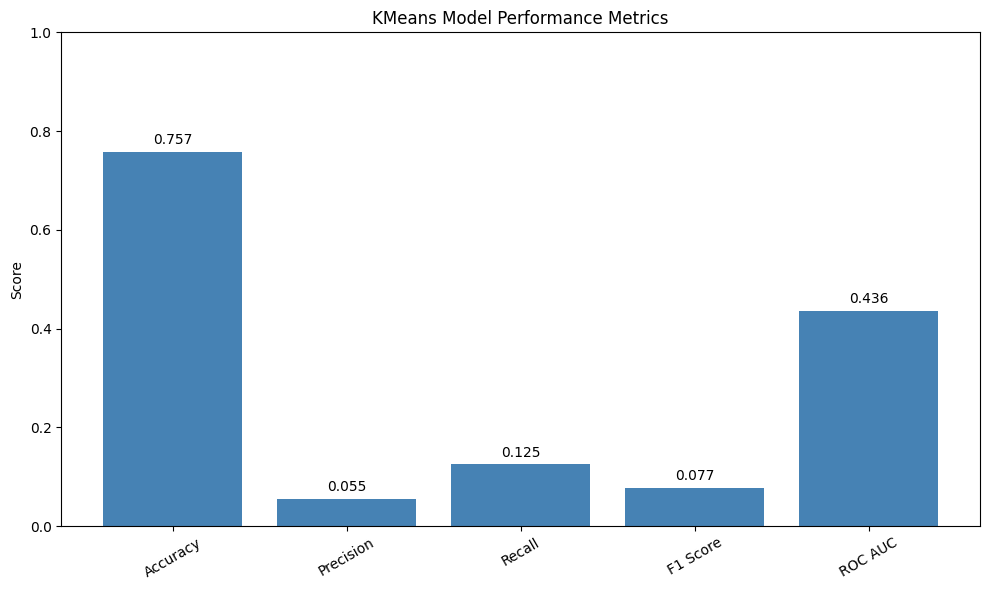

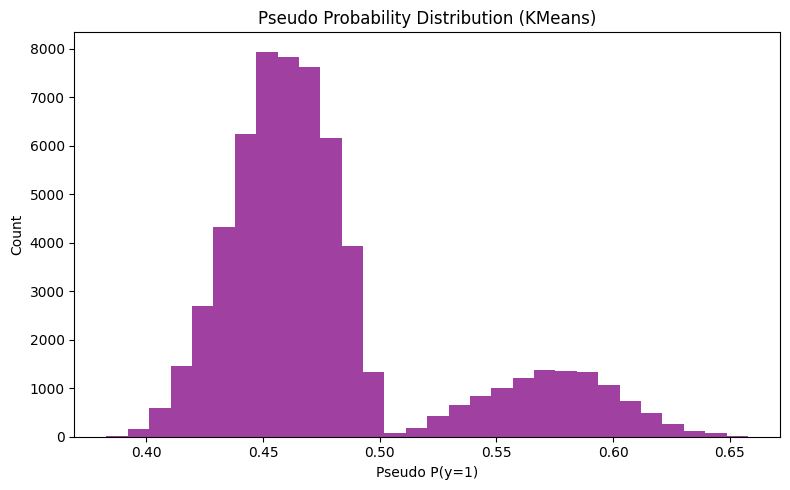

In [44]:
# Comprehensive Model Evaluation (Adjusted for KMeans)
# KMeans is unsupervised: no true predict_proba. We use:
#  - Hard mapped labels: y_test_mapped (already produced earlier) as y_pred_hard
#  - Pseudo probabilities (kmeans_pseudo_proba) from ROC cell if available
# This replaces any direct model.predict / model.predict_proba usage.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# 1. Validate prerequisites
try:
    y_test_mapped
except NameError:
    raise RuntimeError("y_test_mapped not found. Run the cluster mapping cell before this evaluation.")

# Hard predictions
y_pred_final = y_test_mapped

# 2. Core metrics (classification-style on mapped labels)
accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final, zero_division=0)
recall_final = recall_score(y_test, y_pred_final, zero_division=0)
f1_final = f1_score(y_test, y_pred_final, zero_division=0)

# 3. Pseudo probability metrics if available
try:
    kmeans_pseudo_proba
    have_proba = True
except NameError:
    kmeans_pseudo_proba = None
    have_proba = False

if have_proba and len(np.unique(y_test)) == 2:
    roc_auc_final = roc_auc_score(y_test, kmeans_pseudo_proba)
    try:
        avg_precision_final = average_precision_score(y_test, kmeans_pseudo_proba)
    except ValueError:
        avg_precision_final = float('nan')
else:
    roc_auc_final = float('nan')
    avg_precision_final = float('nan')

confusion_final = confusion_matrix(y_test, y_pred_final)

print("=== KMEANS (UNSUPERVISED) EVALUATION WITH MAPPED LABELS ===")
print(f"Test Set Accuracy: {accuracy_final:.4f}")
print(f"Precision: {precision_final:.4f}")
print(f"Recall: {recall_final:.4f}")
print(f"F1 Score: {f1_final:.4f}")
print(f"ROC AUC (pseudo-prob): {roc_auc_final if not np.isnan(roc_auc_final) else 'N/A'}")
print(f"Average Precision (pseudo-prob): {avg_precision_final if not np.isnan(avg_precision_final) else 'N/A'}")
print("Confusion Matrix:")
print(confusion_final)

# 4. Metrics bar plot (exclude NaNs)
metrics = {
    'Accuracy': accuracy_final,
    'Precision': precision_final,
    'Recall': recall_final,
    'F1 Score': f1_final
}
if not np.isnan(roc_auc_final):
    metrics['ROC AUC'] = roc_auc_final

plt.figure(figsize=(10,6))
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

bars = plt.bar(metric_names, metric_values, color=['steelblue']*len(metrics))
plt.title('KMeans Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0,1)
for bar, val in zip(bars, metric_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.01, f'{val:.3f}', ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 5. Optional probability distribution plot
if have_proba:
    plt.figure(figsize=(8,5))
    plt.hist(kmeans_pseudo_proba, bins=30, alpha=0.75, color='purple')
    plt.xlabel('Pseudo P(y=1)')
    plt.ylabel('Count')
    plt.title('Pseudo Probability Distribution (KMeans)')
    plt.tight_layout()
    plt.show()
else:
    print("Pseudo probabilities not available; run the ROC pseudo-probability cell to create kmeans_pseudo_proba before this step.")

In [45]:
# SHAP Analysis for Model Explainability
# KMeans is unsupervised; we approximate a "positive class probability"
# via inverse-distance soft assignments to cluster centers.

# 1. Build a background dataset for Kernel SHAP (clustered summary of training data).
#    shap.kmeans expects the data matrix (not the trained model) and k (number of clusters).
background = shap.kmeans(X_train, k=min(30, X_train.shape[0]))

# 2. Define a prediction function that returns a 1D array: pseudo P(y=1)
def kmeans_positive_proba(X_input):
    distances_local = model.transform(X_input)  # (n_samples, n_clusters)
    inv_local = 1.0 / (distances_local + 1e-12)
    soft_local = inv_local / inv_local.sum(axis=1, keepdims=True)
    # clusters mapped to label 1 (fallback: cluster 1 if mapping missing)
    clusters_label1 = [c for c, lbl in train_mapping.items() if lbl == 1]
    if not clusters_label1:
        clusters_label1 = [1] if model.n_clusters > 1 else [0]
    proba1 = soft_local[:, clusters_label1].sum(axis=1)
    return proba1  # 1D vector (n_samples,)

# 3. Create KernelExplainer using the background summary.
explainer = shap.KernelExplainer(kmeans_positive_proba, background)

# 4. Sample test data for faster SHAP computation
sample_size = min(100, X_test.shape[0])
X_test_sample = X_test[:sample_size]          # numpy slice
y_test_sample = y_test.iloc[:sample_size]     # y_test is a Series

# Reconstruct feature names from original X (DataFrame before scaling)
feature_names = X.columns.tolist()
X_test_sample = pd.DataFrame(X_test_sample, columns=feature_names)

print(f"Computing SHAP values for {sample_size} test samples...")
shap_values = explainer.shap_values(X_test_sample.values)

print("SHAP values computed successfully!")
print(f"Type of shap_values: {type(shap_values)}")
print(f"SHAP values shape: {np.array(shap_values).shape}")
print(f"Base value (expected model output): {explainer.expected_value:.6f}")
print(f"Sample features shape: {X_test_sample.shape}")

# KernelExplainer with single-output function returns a 2D array: (n_samples, n_features)
shap_values_to_use = np.array(shap_values)
base_value = explainer.expected_value

# 5. Feature importance (mean |SHAP| per feature)
mean_shap_importance = np.abs(shap_values_to_use).mean(axis=0)

print(f"SHAP importance shape: {mean_shap_importance.shape}")
print(f"Number of features: {len(feature_names)}")
if len(mean_shap_importance) == len(feature_names):
    print("✓ Shapes match perfectly!")
else:
    print(f"⚠ Shape mismatch! SHAP: {len(mean_shap_importance)}, Features: {len(feature_names)}")

# 6. Assemble importance dataframe
feature_importance_shap = pd.DataFrame({
    'feature': feature_names,
    'shap_importance': mean_shap_importance
}).sort_values('shap_importance', ascending=False)

print("\nTop 10 Most Important Features (SHAP-based):")
print(feature_importance_shap.head(10))

Computing SHAP values for 100 test samples...


  0%|          | 0/100 [00:00<?, ?it/s]

SHAP values computed successfully!
Type of shap_values: <class 'numpy.ndarray'>
SHAP values shape: (100, 166)
Base value (expected model output): 0.447491
Sample features shape: (100, 166)
SHAP importance shape: (166,)
Number of features: 166
✓ Shapes match perfectly!

Top 10 Most Important Features (SHAP-based):
                          feature  shap_importance
12                 FLAG_EMP_PHONE         0.008525
79     NAME_INCOME_TYPE_Pensioner         0.008524
8                   DAYS_EMPLOYED         0.008466
165         ORGANIZATION_TYPE_XNA         0.008444
7                      DAYS_BIRTH         0.004347
83       NAME_INCOME_TYPE_Working         0.003901
38                FLAG_DOCUMENT_6         0.001505
119  ORGANIZATION_TYPE_Government         0.001183
35                FLAG_DOCUMENT_3         0.001079
10                DAYS_ID_PUBLISH         0.000918


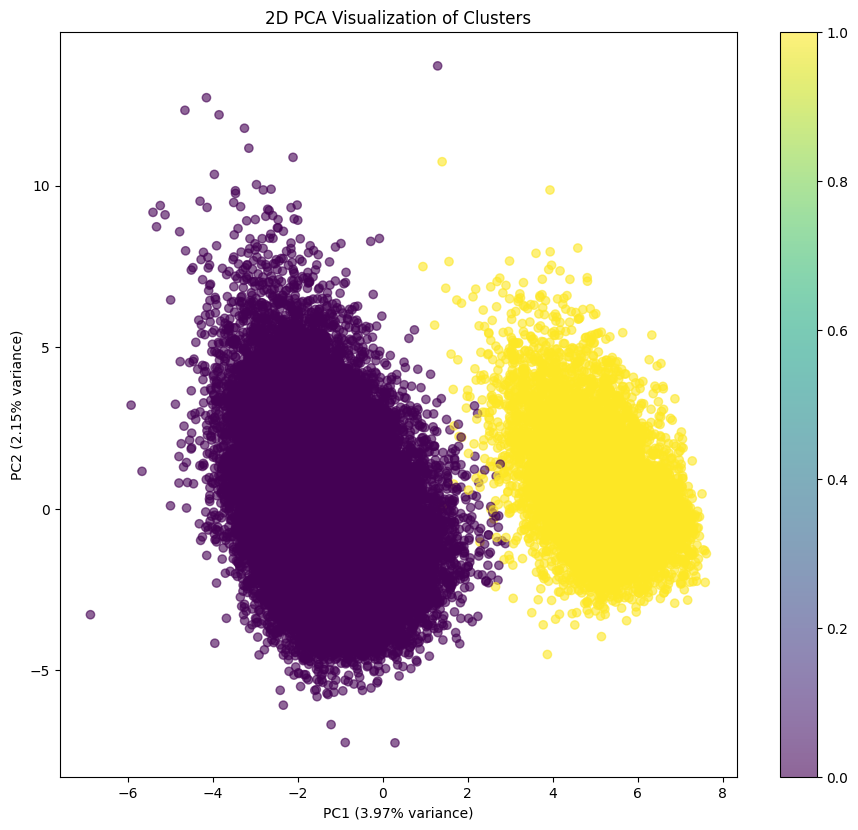

In [46]:
# 6. 2D PCA Visualization of Clusters
plt.figure(figsize=(27, 16))
plt.subplot(2, 3, 6)
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_test_pca = pca.fit_transform(X_test)

scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pred, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('2D PCA Visualization of Clusters')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')

plt.tight_layout()
plt.show()

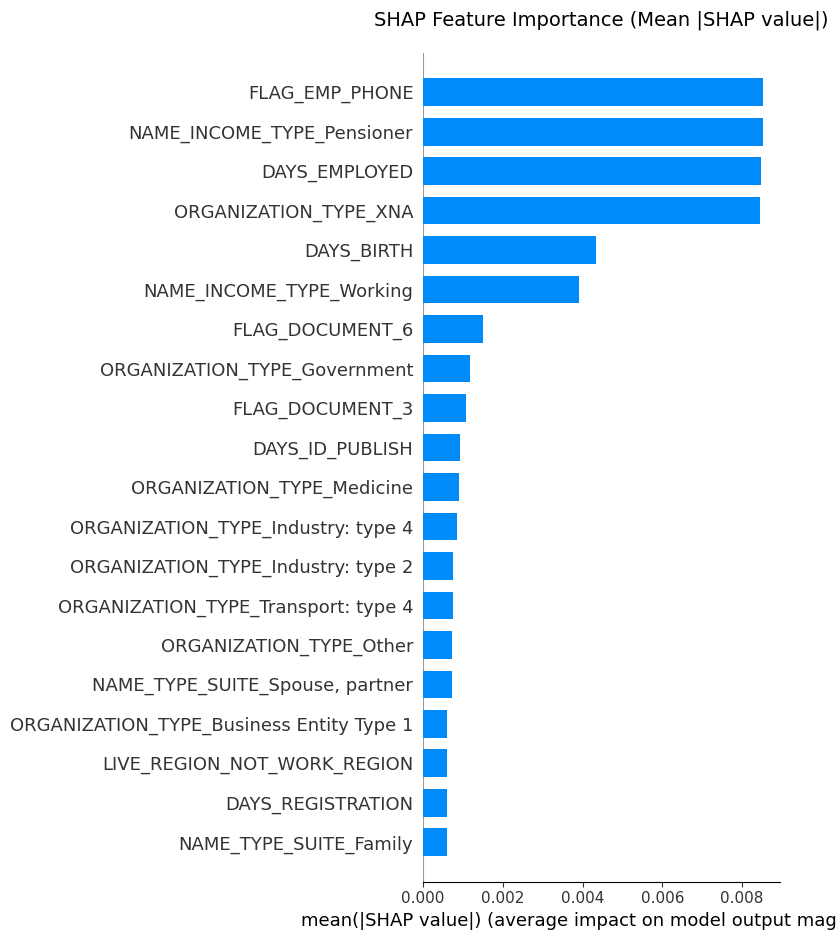

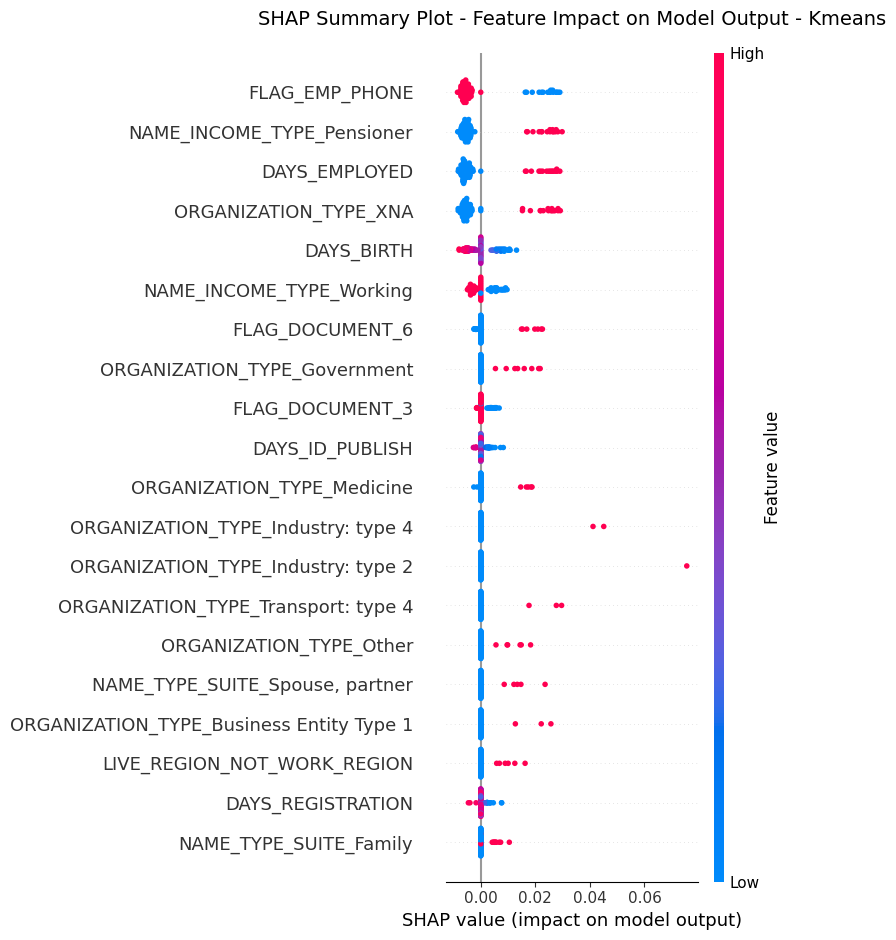

In [49]:
# SHAP Summary Plot - Shows feature importance and impact direction
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_to_use, X_test_sample, plot_type="bar", show=False)
plt.title('SHAP Feature Importance (Mean |SHAP value|)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# SHAP Summary Plot with feature values
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values_to_use, X_test_sample, show=False)
plt.title('SHAP Summary Plot - Feature Impact on Model Output - Kmeans', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


=== SAMPLE 1 (Index 0) ===
Actual label: 0
Predicted probability (class 1): 0.4580


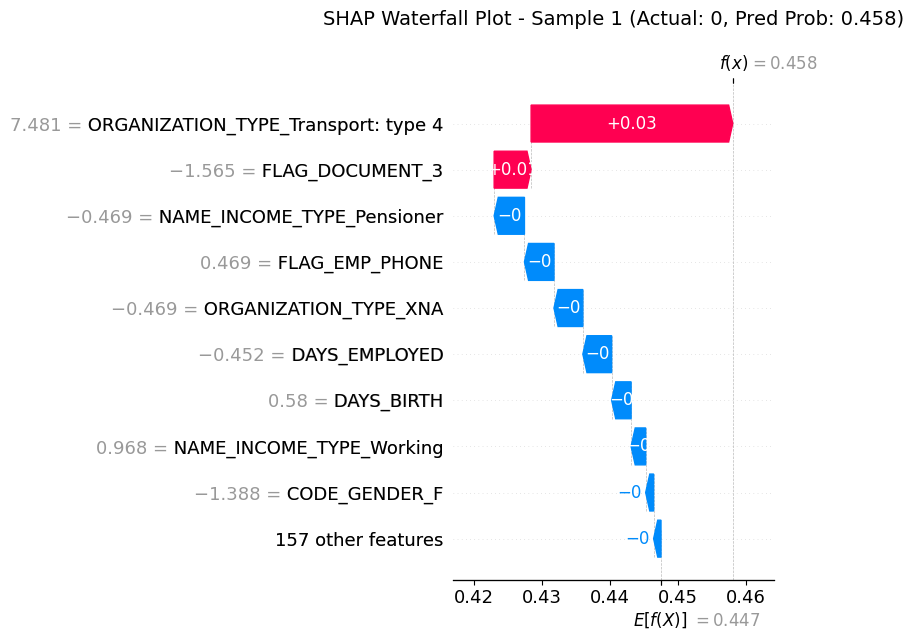


=== SAMPLE 2 (Index 1) ===
Actual label: 0
Predicted probability (class 1): 0.4530


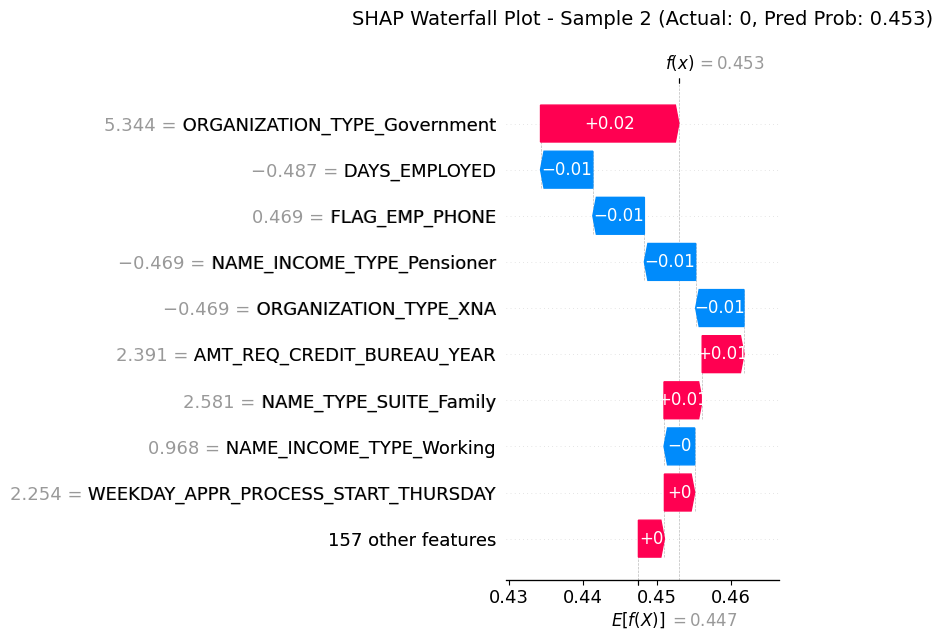


=== SAMPLE 3 (Index 2) ===
Actual label: 0
Predicted probability (class 1): 0.4924


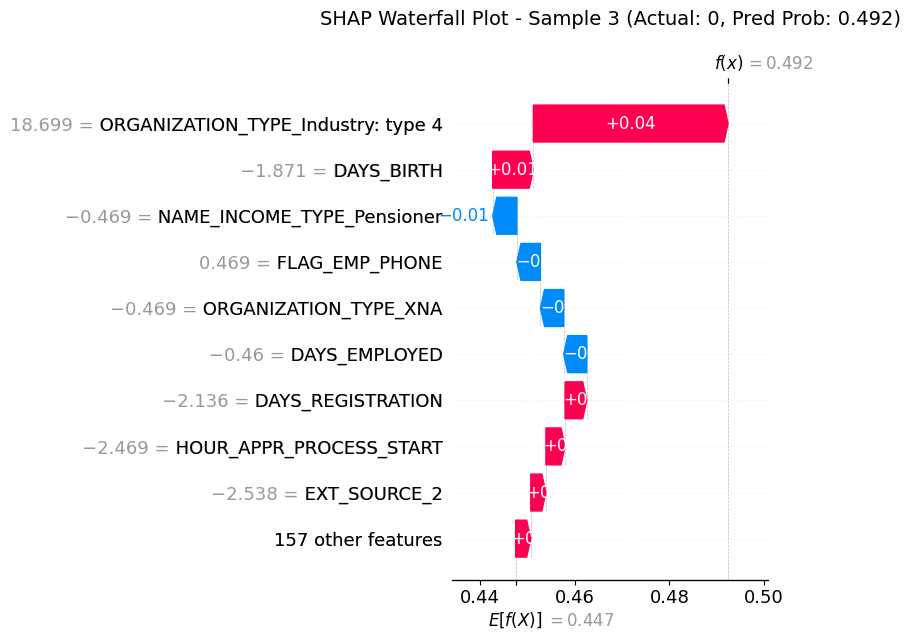

In [48]:
# SHAP Waterfall Plot - Explain individual predictions
# Select a few interesting samples to explain
sample_indices = [0, 1, 2]  # First three samples

for i, idx in enumerate(sample_indices):
    actual_label = y_test_sample.iloc[idx]
    
    # KMeans has no predict_proba; use the pseudo-probability function defined earlier.
    try:
        # Preferred path: use previously defined helper (Cell 28)
        predicted_prob = kmeans_positive_proba(X_test_sample.iloc[[idx]].values)[0]
    except NameError:
        # Fallback: recompute inverse-distance soft assignment manually
        distances_local = model.transform(X_test_sample.iloc[[idx]].values)  # shape (1, n_clusters)
        inv_local = 1.0 / (distances_local + 1e-12)
        soft_local = inv_local / inv_local.sum(axis=1, keepdims=True)
        clusters_label1 = [c for c, lbl in train_mapping.items() if lbl == 1]
        if not clusters_label1:
            clusters_label1 = [1] if model.n_clusters > 1 else [0]
        predicted_prob = soft_local[:, clusters_label1].sum()
    
    print(f"\n=== SAMPLE {i+1} (Index {idx}) ===")
    print(f"Actual label: {actual_label}")
    print(f"Predicted probability (class 1): {predicted_prob:.4f}")
    
    # Create waterfall plot
    plt.figure(figsize=(12, 8))
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values_to_use[idx], 
            base_values=base_value, 
            data=X_test_sample.iloc[idx],
            feature_names=X_test_sample.columns.tolist()
        ),
        show=False
    )
    plt.title(f'SHAP Waterfall Plot - Sample {i+1} (Actual: {actual_label}, Pred Prob: {predicted_prob:.3f})', 
              fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()